# **1. Classificação de Imagens (Food vs Non-Food)**

O foco é avaliar o desempenho das abordagens baseadas em Redes Neurais Convolucionais (CNNs)

# **2. Metodologia/ Dados Preliminares**

**Dataset**

O Food5K Dataset é composto por 5.000 imagens divididas em três subconjuntos:

**Treinamento**: /training

**Validação**: /validation

**Teste**: /evaluation

**Accelerator**: GPU P100

Cada subconjunto contém duas classes:

food/ — imagens de alimentos

non_food/ — imagens sem alimentos

As imagens foram redimensionadas para 128x128 pixels e normalizadas (rescale=1./255).

# **3. Métodos Avaliados**

* Modelo 1: CNN básica (modelo de referência).
* Modelo 2: CNN com otimização de hiperparâmetros.
* Modelo 3: CNN leve e simplificada.
* Modelo 4: MobileNetV2 

## 3.1 Modelo 1 – Modelo da Literatura (BASELINE)
**Contexto do Problema**

O objetivo é classificar imagens em duas categorias:

* Food (comida)

* Non-Food (não-comida)

Ou seja, é um problema de classificação binária de imagens, muito comum em visão computacional.

O dataset usado é o Food-5K, que contém:

* /training/food/ e /training/non_food/

* /validation/food/ e /validation/non_food/

* /evaluation/food/ e /evaluation/non_food/

**The Probelm description :-**

Classify images in two Categories
* Food
* Non-Food


**Importação de bibliotecas e leitura de dados**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food5k-image-dataset/validation/food/208.jpg
/kaggle/input/food5k-image-dataset/validation/food/473.jpg
/kaggle/input/food5k-image-dataset/validation/food/333.jpg
/kaggle/input/food5k-image-dataset/validation/food/45.jpg
/kaggle/input/food5k-image-dataset/validation/food/369.jpg
/kaggle/input/food5k-image-dataset/validation/food/56.jpg
/kaggle/input/food5k-image-dataset/validation/food/89.jpg
/kaggle/input/food5k-image-dataset/validation/food/20.jpg
/kaggle/input/food5k-image-dataset/validation/food/275.jpg
/kaggle/input/food5k-image-dataset/validation/food/212.jpg
/kaggle/input/food5k-image-dataset/validation/food/239.jpg
/kaggle/input/food5k-image-dataset/validation/food/58.jpg
/kaggle/input/food5k-image-dataset/validation/food/150.jpg
/kaggle/input/food5k-image-dataset/validation/food/6.jpg
/kaggle/input/food5k-image-dataset/validation/food/109.jpg
/kaggle/input/food5k-image-dataset/validation/food/149.jpg
/kaggle/input/food5k-image-dataset/validation/food/187.jpg
/kag

In [2]:
#Importing required packages
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Bibliotecas para:

* Manipular dados (numpy, pandas)

* Visualizar imagens (matplotlib)

* Criar e treinar modelos de deep learning (tensorflow.keras)

**Visualização de imagens de exemplo**

Essas linhas apenas exibem imagens de cada classe para garantir que o dataset está correto e as pastas estão bem organizadas.

Text(0.5, 1.0, 'Non food category image')

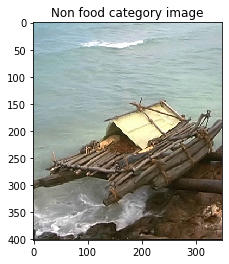

In [3]:
# checking a random picture from different categories
non_food = plt.imread('/kaggle/input/food5k-image-dataset/validation/non_food/433.jpg')
plt.imshow(non_food)
plt.title('Non food category image')


Text(0.5, 1.0, 'Food category image')

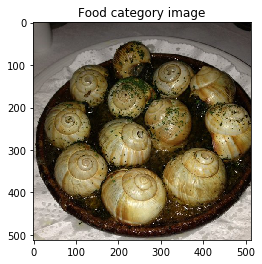

In [4]:
# checking a random picture from different categories
food = plt.imread('/kaggle/input/food5k-image-dataset/validation/food/270.jpg')
plt.imshow(food)
plt.title('Food category image')

**Geração dos dados de treino, validação e teste**

In [5]:
# Creating a ImageGenerator
train_datagen = ImageDataGenerator(
                    rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory='/kaggle/input/food5k-image-dataset/training',
                                                   target_size=(128,128),
                                                   classes=['food','non_food'],
                                                   class_mode='binary')

Found 3000 images belonging to 2 classes.


In [6]:
# Creating Validation Generator
valid_datagen = ImageDataGenerator(
                    rescale = 1./255)

valid_generator = valid_datagen.flow_from_directory(directory='/kaggle/input/food5k-image-dataset/validation',
                                                   target_size=(128,128),
                                                   classes=['food','non_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [7]:
# Creating Validation Generator
test_datagen = ImageDataGenerator(
                    rescale = 1./255)

test_generator = valid_datagen.flow_from_directory(directory='/kaggle/input/food5k-image-dataset/evaluation',
                                                   target_size=(128,128),
                                                   classes=['food','non_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


Aqui ele usa ImageDataGenerator para:

* Ler as imagens diretamente das pastas

* Normalizar os pixels 

* Redimensionar todas para (128x128)

Isso é importante porque:

* Redes neurais esperam entradas de tamanho fixo.

* Normalizar os valores ajuda o modelo a aprender mais rápido.

Ele repete o mesmo processo para validação e teste.

**Criação do Modelo — CNN (Convolutional Neural Network)**

In [8]:
#creating a Simple Convolution layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,kernel_initializer='he_normal',kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128,kernel_initializer='he_normal',kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256,kernel_initializer='he_normal',kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))



* É uma CNN feita do zero não usa nenhum modelo pré-treinado (como ResNet, VGG, etc.).

* Camadas Conv2D extraem características visuais (bordas, texturas, formas).

* MaxPool2D reduz a dimensão da imagem mantendo informações importantes.

* Dropout previne overfitting (faz o modelo generalizar melhor).

* Flatten transforma os mapas de características em um vetor 1D.

* Dense cria camadas totalmente conectadas (MLP) para a classificação final.

* A última camada (Dense(1, activation='sigmoid')) retorna um valor entre 0 e 1, ideal para classificação binária.

In [9]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

**Compilação e Treinamento**

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
Y = model.fit_generator(train_generator, epochs=5,validation_data=valid_generator)

Train for 94 steps, validate for 32 steps
Epoch 1/5
94/94 [==============================] - 56s 594ms/step - loss: 1.8504 - accuracy: 0.7067 - val_loss: 0.4536 - val_accuracy: 0.8180
Epoch 2/5
94/94 [==============================] - 40s 429ms/step - loss: 0.4337 - accuracy: 0.8027 - val_loss: 0.3597 - val_accuracy: 0.8540
Epoch 3/5
94/94 [==============================] - 40s 428ms/step - loss: 0.3583 - accuracy: 0.8483 - val_loss: 0.3488 - val_accuracy: 0.8600
Epoch 4/5
94/94 [==============================] - 40s 424ms/step - loss: 0.3071 - accuracy: 0.8787 - val_loss: 0.3590 - val_accuracy: 0.8650
Epoch 5/5
94/94 [==============================] - 40s 423ms/step - loss: 0.2728 - accuracy: 0.8893 - val_loss: 0.3440 - val_accuracy: 0.8720


* Treina por 5 épocas.

* Avalia o desempenho em cada época no conjunto de validação.

**Avaliação no conjunto de teste**

In [12]:
model.evaluate_generator(test_generator,steps=len(test_generator))

[0.41204702761024237, 0.836]

* Mede a acurácia final do modelo no dataset de teste, que nunca foi visto durante o treino.

## 3.2 Modelo 2 – CNN com Otimização de Hiperparâmetros

* Estrutura mais leve, com redução do número de filtros.
* Aplicação de dropout mais moderado.
* Taxa de aprendizado reduzida (0.0005) para maior estabilidade -> optimizer =  Adam(learning_rate=0.0005)


**Arquitetura Modelo 2**

**1. Extração de Características**

* Conv2D (3x3) -> aprende filtros que extraem padrões visuais (bordas, texturas, cores).
* ReLU → introduz não linearidade, permitindo aprendizado de padrões complexos.
* MaxPooling (2x2) -> reduz o tamanho da imagem, mantendo só as partes mais importantes (reduz sobreajuste e custo computacional).
* Dropout(0.25) -> desativa aleatoriamente 25% dos neurônios durante o treino, ajudando a evitar overfitting.

**2. Camada de Classificação Final**

* Flatten -> transforma o mapa 2D (saída das convoluções) em um vetor 1D.
* Dense(256) -> combina as características aprendidas em conexões totalmente ligadas, permitindo que o modelo aprenda relações mais abstratas.

**3. Saída (Output Layer)**

Essa parte do diagrama mostra a decisão final do modelo —> a classificação binária.
* Um único neurônio (Dense(1)) com ativação sigmoid produz uma probabilidade entre 0 e 1, isso indica a confiança de que a imagem pertence a classe estudada(por exemplo,“Food”).

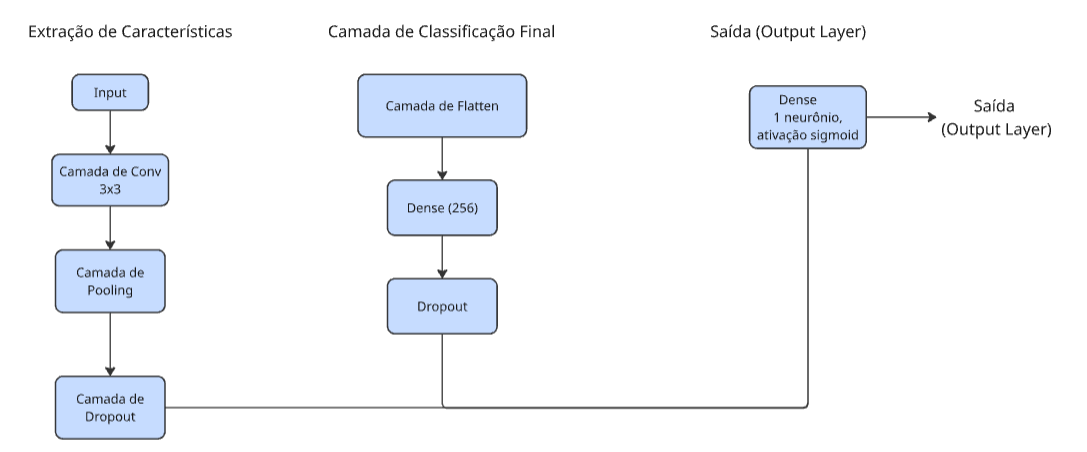

In [13]:
model_opt = tf.keras.Sequential()
# É onde o input é definido
# Camada cov
# Primeira convolução
model_opt.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model_opt.add(tf.keras.layers.MaxPooling2D(2,2))
model_opt.add(tf.keras.layers.Dropout(0.25))

# Segunda convolução
model_opt.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_opt.add(tf.keras.layers.MaxPooling2D(2,2))
model_opt.add(tf.keras.layers.Dropout(0.25))

# Classificação Final
model_opt.add(tf.keras.layers.Flatten())
model_opt.add(tf.keras.layers.Dense(256, activation='relu'))

# Saída(Output Layer)
model_opt.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [14]:
# Mudança de otimizador e taxa de aprendizado
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

model_opt.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print("\nTreinando Modelo 2 - Otimização de Hiperparâmetros")
history_opt = model_opt.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator
)

print("\nAvaliação Modelo 2:")
model_opt.evaluate(test_generator, steps=len(test_generator))




Treinando Modelo 2 - Otimização de Hiperparâmetros
Train for 94 steps, validate for 32 steps
Epoch 1/5
94/94 [==============================] - 41s 432ms/step - loss: 0.8139 - accuracy: 0.6660 - val_loss: 0.4834 - val_accuracy: 0.7910
Epoch 2/5
94/94 [==============================] - 40s 430ms/step - loss: 0.4278 - accuracy: 0.8073 - val_loss: 0.4299 - val_accuracy: 0.8160
Epoch 3/5
94/94 [==============================] - 40s 428ms/step - loss: 0.3634 - accuracy: 0.8390 - val_loss: 0.4227 - val_accuracy: 0.8360
Epoch 4/5
94/94 [==============================] - 40s 427ms/step - loss: 0.3069 - accuracy: 0.8740 - val_loss: 0.3647 - val_accuracy: 0.8680
Epoch 5/5
94/94 [==============================] - 40s 427ms/step - loss: 0.2537 - accuracy: 0.8987 - val_loss: 0.3451 - val_accuracy: 0.8770

Avaliação Modelo 2:
32/32 [==============================] - 21s 654ms/step - loss: 0.3711 - accuracy: 0.8560


[0.37112515419721603, 0.856]

## 3.3 Modelo 3 – CNN Leve (Arquitetura Mais Leve)

* Menos camadas convolucionais e uso de GlobalAveragePooling2D.
* Foco em eficiência e baixo custo computacional.
* Ideal para dispositivos com restrição de hardware.

**Arquitetura Modelo 3**

**1. Input**

Essa é a camada de entrada, recebe imagens do tamanho 128×128x3 

**2. Convolução 3×3**

Aplica filtros convolucionais sobre a imagem, cada filtro aprende a detectar padrões

**3. Pooling Máximo 2×2**

Reduz o tamanho da imagem pela metade, pegando apenas o valor máximo em cada bloco 2×2.
Serve para:

* Diminuir o custo computacional

* Manter as informações mais relevantes

Exemplo: se a entrada era 128×128 após o pooling pode se tornar 64×64

**4. Global Average Pooling**

A GlobalAveragePooling2D faz a média dos valores de cada filtro, transformando cada mapa de ativação em um único número, isso reduz os parâmetros, deixa o modelo mais leve e melhora a generalização.

**5. Dense(1 neurônio,ativação sigmoid)**

Camada final que produz a saída da classificação, como existe apenas 1 neurônio com ativação sigmoid, o resultado é um valor entre 0 e 1 -> interpretado como probabilidade de pertencer a classe estudada.



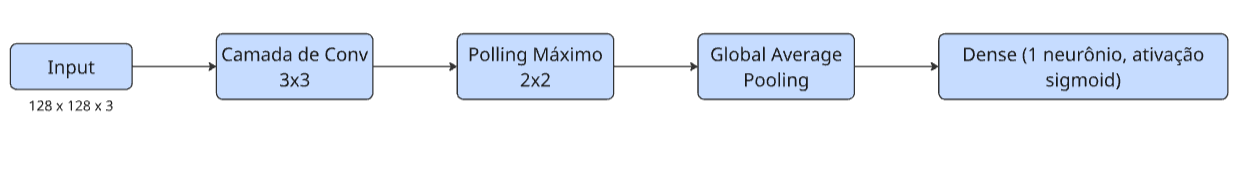
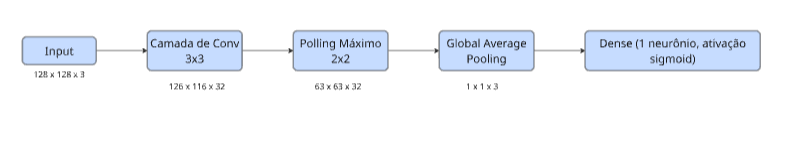

In [15]:
model_light = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_light.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
print("\nTreinando Modelo 3 - Arquitetura Leve")
history_light = model_light.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator
)

print("\nAvaliação Modelo 3:")
model_light.evaluate(test_generator, steps=len(test_generator))



Treinando Modelo 3 - Arquitetura Leve
Train for 94 steps, validate for 32 steps
Epoch 1/5
94/94 [==============================] - 40s 429ms/step - loss: 0.5845 - accuracy: 0.6943 - val_loss: 0.5548 - val_accuracy: 0.7480
Epoch 2/5
94/94 [==============================] - 40s 426ms/step - loss: 0.5224 - accuracy: 0.7343 - val_loss: 0.5129 - val_accuracy: 0.7470
Epoch 3/5
94/94 [==============================] - 39s 420ms/step - loss: 0.5035 - accuracy: 0.7513 - val_loss: 0.5040 - val_accuracy: 0.7510
Epoch 4/5
94/94 [==============================] - 40s 421ms/step - loss: 0.4899 - accuracy: 0.7583 - val_loss: 0.4959 - val_accuracy: 0.7560
Epoch 5/5
94/94 [==============================] - 40s 422ms/step - loss: 0.4863 - accuracy: 0.7697 - val_loss: 0.5101 - val_accuracy: 0.7550

Avaliação Modelo 3:
32/32 [==============================] - 21s 642ms/step - loss: 0.5226 - accuracy: 0.7570


[0.5226409398019314, 0.757]

## 3.4 Modelo 4 – MobileNetV2


**Resumo:** 
* Rede pré-treinada no ImageNet.
* Camadas base congeladas.
* Cabeçalho personalizado com camadas Dense e Dropout.
* Estratégias de data augmentation aplicadas durante o treinamento.
* 
obs: O augmentation só é aplicado aos dados de treinamento

**Técnicas de Augmentation aplicadas**
```python
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,           # ROTAÇÃO - gira imagens até 15 graus
    width_shift_range=0.1,       # DESLOCAMENTO HORIZONTAL - até 10% da largura
    height_shift_range=0.1,      # DESLOCAMENTO VERTICAL - até 10% da altura
    shear_range=0.1,             # CISALHAMENTO - transformação angular
    zoom_range=0.1,              # ZOOM - ampliação/redução de até 10%
    horizontal_flip=True,        # FLIP HORIZONTAL - espelhamento
    fill_mode='nearest'          # PREENCHIMENTO - preenche pixels criados
)

### 3.4.1 Arquitetura do Modelo: MobileNetV2 com Cabeçalho Personalizado (Transfer Learning)

**1. Backbone (Extração de Características)**

A primeira parte do modelo é o Backbone, responsável por extrair as características visuais das imagens.
Neste caso, utilizamos a MobileNetV2, uma rede convolucional leve e eficiente, pré-treinada no ImageNet, o que permite aproveitar seu conhecimento prévio sobre formas, texturas e padrões.

O que acontece aqui:
* **Camada de entrada (Input)**: recebe as imagens redimensionadas para (128, 128, 3).

* **Convoluções iniciais (Conv 3×3)**: capturam padrões básicos como bordas e cores.

* **Blocos Inverted Residual**: unidades centrais da MobileNetV2, que combinam convoluções expansivas e projeções para extrair recursos com alta eficiência computacional.

* (Obs.) O GlobalAveragePooling virá na Classifier Head e não dentro do backbone.

**2. Classifier Head (Camada de Classificação Final)**

Após o Backbone foi adicionado a Classifier Head que é a parte do modelo responsável por adaptar o conhecimento extraído da MobileNetV2 a tarefa específica, nesse caso classificar se a imagem é “comida” ou “não comida”.

Camadas incluídas:

* **GlobalAveragePooling2D**: pega cada mapa de características gerado pela MobileNetV2 e calcula a média dos valores dentro dele. Dessa forma, cada canal é resumido em um único número, criando um vetor 1D que representa o “resumo geral” da imagem, preservando as informações mais relevantes aprendidas pelo modelo

* **Dropout(0.3)**: desativa aleatoriamente 30% dos neurônios durante o treinamento, impedindo que o modelo dependa demais de combinações específicas de unidades. Além disso, a técnica ajuda a reduzir o overfitting e melhora a capacidade de generalização do modelo.

* **Dense(128, ReLU)**: camada totalmente conectada com 128 neurônios responsável por combinar e interpretar as características extraídas pelo backbone. A ativação ReLU introduz não linearidade permitindo que o modelo aprenda padrões mais complexos e abstratos.

* **Dropout(0.3)**: aplicada novamente antes da camada final, atua como nova etapa de regularização,ajudando a estabilizar o aprendizado e a evitar que o modelo memorize ruídos ou padrões irrelevantes dos dados.


**3. Saída (Output Layer)**

A camada de saída é a parte final do modelo! É ela que gera a resposta da rede dizendo qual classe a imagem pertence.

O que ela faz:
* Dense(1, activation='sigmoid') -> Essa camada tem apenas 1 neurônio que produz um valor entre 0 e 1. Esse valor representa a probabilidade de a imagem pertencer a classe estudada.

```pyhton
# Camada de saída
output = Dense(1, activation='sigmoid')(x)
model_mobilenetv2 = Model(inputs=base_model.input, outputs=output)


**Compilação do modelo:**

Nesse etapa, o modelo aprende a associar os padrões visuais extraídos pelo backbone as probabilidades de cada classe finalizando o processo de decisão da rede.

A função de perda Binary Crossentropy mede a diferença entre as probabilidades previstas e os rótulos reais (0 ou 1), enquanto o otimizador Adam ajusta os pesos do modelo para minimizar esse erro e melhorar a acurácia ao longo do treinamento.

```
model_mobilenetv2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


**Figura: Arquitetura do treinamento**

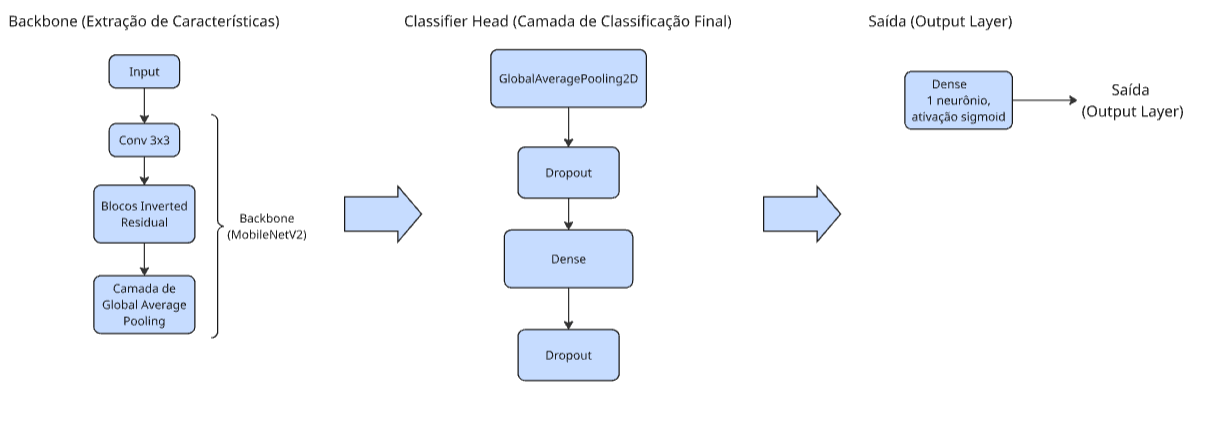



### 3.4.2 Modelo MobileNetV2

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns


In [18]:
#  Geradores de Dados
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/food5k-image-dataset/training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    '/kaggle/input/food5k-image-dataset/validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/food5k-image-dataset/evaluation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# CONSTRUÇÃO DO MODELO MOBILE-NET PRÉ-TREINADO
#cov(3)
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

# Congela as camadas base
for layer in base_model.layers:
    layer.trainable = False

# Cabeçalho personalizado
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model_mobilenetv2 = Model(inputs=base_model.input, outputs=output)

# Compilação
model_mobilenetv2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


9412608/9406464 [==============================] - 1s 0us/step


In [20]:
# TREINAMENTO DO MODELO
print("\nTreinando Modelo 4 - MobileNetV2 (Food vs Non-Food)")
history_mobilenetv2 = model_mobilenetv2.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    verbose=1
)


Treinando Modelo 4 - MobileNetV2 (Food vs Non-Food)
Train for 94 steps, validate for 32 steps
Epoch 1/10
94/94 [==============================] - 53s 561ms/step - loss: 0.5080 - accuracy: 0.7467 - val_loss: 0.2918 - val_accuracy: 0.8670
Epoch 2/10
94/94 [==============================] - 50s 530ms/step - loss: 0.2660 - accuracy: 0.8977 - val_loss: 0.2495 - val_accuracy: 0.8910
Epoch 3/10
94/94 [==============================] - 50s 532ms/step - loss: 0.1991 - accuracy: 0.9260 - val_loss: 0.2346 - val_accuracy: 0.9050
Epoch 4/10
94/94 [==============================] - 50s 531ms/step - loss: 0.1849 - accuracy: 0.9307 - val_loss: 0.3024 - val_accuracy: 0.8750
Epoch 5/10
94/94 [==============================] - 52s 549ms/step - loss: 0.1609 - accuracy: 0.9393 - val_loss: 0.2820 - val_accuracy: 0.8920
Epoch 6/10
94/94 [==============================] - 50s 534ms/step - loss: 0.1589 - accuracy: 0.9387 - val_loss: 0.3514 - val_accuracy: 0.8720
Epoch 7/10
94/94 [=============================

In [21]:
# AVALIAÇÃO FINAL (TESTE)
print("\nAvaliação Modelo 4 - MobileNetV2")
loss, acc = model_mobilenetv2.evaluate(test_generator, steps=len(test_generator))
print(f"Acurácia do Modelo 4 (MobileNetV2): {acc * 100:.2f}%")


Avaliação Modelo 4 - MobileNetV2
32/32 [==============================] - 22s 677ms/step - loss: 0.2807 - accuracy: 0.9020
Acurácia do Modelo 4 (MobileNetV2): 90.20%


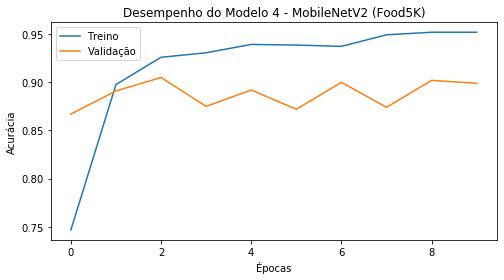

In [22]:
# GRÁFICO DE DESEMPENHO

plt.figure(figsize=(8, 4))
plt.plot(history_mobilenetv2.history['accuracy'], label='Treino')
plt.plot(history_mobilenetv2.history['val_accuracy'], label='Validação')
plt.title('Desempenho do Modelo 4 - MobileNetV2 (Food5K)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()



--- Avaliação Detalhada do Modelo 4 (MobileNetV2) ---
Found 1000 images belonging to 2 classes.
32/32 [==============================] - 22s 672ms/step

Classification Report:
              precision    recall  f1-score   support

        food       0.84      1.00      0.91       500
    non_food       1.00      0.81      0.89       500

    accuracy                           0.90      1000
   macro avg       0.92      0.90      0.90      1000
weighted avg       0.92      0.90      0.90      1000



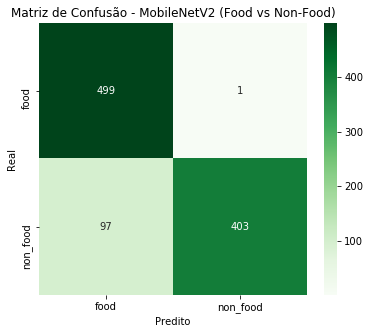

In [23]:
# AVALIAÇÃO DETALHADA 

print("\n--- Avaliação Detalhada do Modelo 4 (MobileNetV2) ---")

# Garante que o gerador de teste não foi sobrescrito
test_path = "/kaggle/input/food5k-image-dataset/evaluation"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Fazendo previsões com o modelo treinado
preds = model_mobilenetv2.predict(test_generator, verbose=1)

# Convertendo probabilidades em rótulos binários
y_pred = (preds > 0.5).astype(int).ravel()
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Relatório de Classificação
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - MobileNetV2 (Food vs Non-Food)')
plt.show()

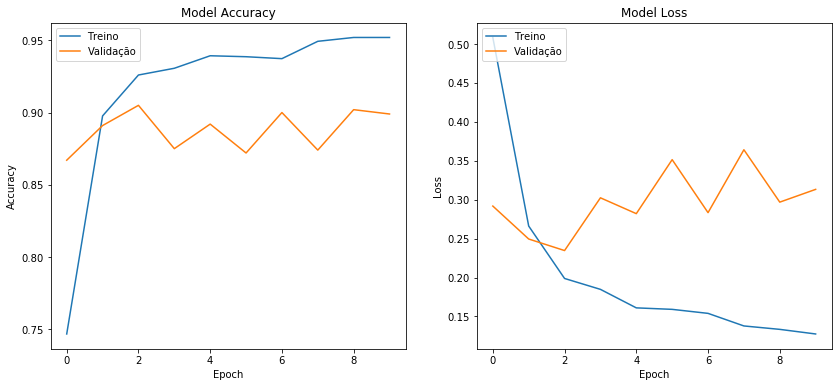

In [24]:
# GRÁFICOS DE DESEMPENHO (ACURÁCIA e LOSS)

plt.figure(figsize=(14, 6))

# Plot da acurácia (treino vs validação)
plt.subplot(1, 2, 1)
plt.plot(history_mobilenetv2.history['accuracy'])
plt.plot(history_mobilenetv2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Treino', 'Validação'], loc='upper left')

# Plot da perda (treino vs validação)
plt.subplot(1, 2, 2)
plt.plot(history_mobilenetv2.history['loss'])
plt.plot(history_mobilenetv2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'], loc='upper left')

plt.show()


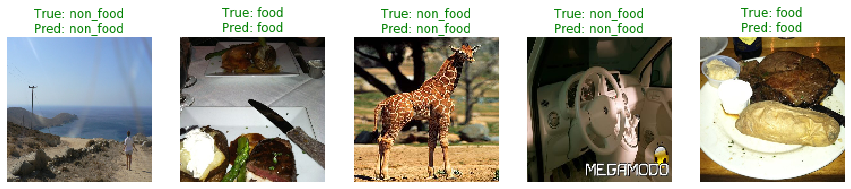

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(generator, model, num_images=5):
    # Pega um lote de imagens e rótulos reais
    images, labels = next(generator)

    # Faz previsões
    predictions = model.predict(images)
    predicted_classes = (predictions > 0.5).astype(int).ravel()

    # Obtém os nomes das classes
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[int(labels[i])]
        pred_label = class_labels[int(predicted_classes[i])]
        color = "green" if true_label == pred_label else "red"
        plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
        plt.axis('off')
    plt.show()

# Exemplo de uso (pode usar valid_generator ou test_generator)
visualize_predictions(valid_generator, model_mobilenetv2, num_images=5)


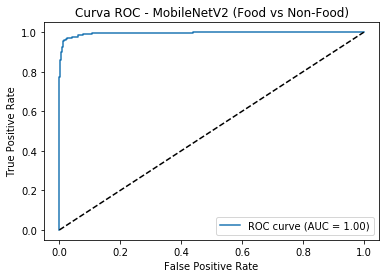

In [26]:
# Curva ROC e AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - MobileNetV2 (Food vs Non-Food)')
plt.legend(loc='lower right')
plt.show()


**Matriz de Confusão:**
A matriz de confusão é uma ferramenta usada para avaliar o desempenho de um modelo de classificação, mostrando o número de previsões corretas e incorretas para cada classe. Ela fornece uma análise detalhada de como o modelo classifica os dados. Em um problema de classificação binária, ela representa os valores reais e previstos em um formato de matriz quadrada:

**Tabela**. Matriz quadrada com linhas e colunas representando as classes.
|  | Previsto positivo| 	Previsto negativo |
|:--|:--:|:--|
| **Positivo real** | Verdadeiro positivo (VP) | Falso negativo (FN) | 
| **Negativo real** | Falso positivo (FP) | Verdadeiro negativo (NV)|

Componentes principais:
 * Verdadeiro positivo (VP) : O número de amostras previstas como positivas e que são realmente positivas
 * Falso positivo (FP) : O número de amostras previstas como positivas, mas que na verdade são negativas
 * Falso negativo (FN) : O número de amostras previstas como negativas, mas que na verdade são positivas
 * Verdadeiro negativo (TN) : O número de amostras previstas como negativas e que são realmente negativas

In [27]:
# Extrai os valores da matriz de confusão
tn, fp, fn, tp = cm.ravel()

# Cria tabela resumida
import pandas as pd

df_errors = pd.DataFrame({
    'Predito Positivo': [tp, fp],
    'Predito Negativo': [fn, tn]
}, index=['Real Positivo', 'Real Negativo'])

print("Tabela de Falsos e Verdadeiros:")
display(df_errors)


Tabela de Falsos e Verdadeiros:


,Predito Positivo,Predito Negativo
Real Positivo,403,97
Real Negativo,1,499


### **Métricas**

#### **Acurácia**

$$
\text{Acurácia} = \frac{VP + VN}{VP + VN + FP + FN}
$$

Substituindo:

$$
\frac{403 + 499}{403 + 97 + 1 + 499} = \frac{902}{1000} = 0{,}902
$$

 **90,2% de acerto**

---

#### **Precisão (classe positiva)**

$$
\text{Precisão} = \frac{VP}{VP + FP}
$$

Substituindo:

$$
\frac{403}{403 + 1} = 0{,}997
$$

 **Excelente (quase sem falsos positivos)**

---

#### **Recall (sensibilidade)**

$$
\text{Recall} = \frac{VP}{VP + FN}
$$

Substituindo:

$$
\frac{403}{403 + 97} = 0{,}806
$$

**80,6%**, indicando que o modelo **deixa escapar algumas imagens que são “comida”**.

---


## 3.5 Métricas de Avaliação Implementadas

| Métrica | Está no código? | Onde aparece | Modelos |
|:--|:--:|:--|:--|
| **Acurácia** | ✅ | `model.fit` e gráficos | ✅ Modelo 1, 2, 3, 4 |
| **Matriz de confusão** | ✅ | `confusion_matrix` + `sns.heatmap` | ✅ Modelo 4 |
| **Precision / Recall / F1-score** | ✅ | `classification_report` | ✅ Modelo 4 |
| **ROC e AUC** | ✅ | `roc_curve`, `auc` | ✅ Modelo 4 |
| **Visualização de previsões** | ✅ | `visualize_predictions()` | ✅ Modelo 4 |

# 4. Comparação dos Resultados

In [28]:
# Avaliação final no conjunto de teste (comparação real)
print("\n AVALIAÇÃO NO TESTE FINAL ")
print("Modelo 1 (Original):", model.evaluate(test_generator, steps=len(test_generator)))
print("Modelo 2 (Otimização Hiperparâmetros):", model_opt.evaluate(test_generator, steps=len(test_generator)))
print("Modelo 3 (Arquitetura Leve):", model_light.evaluate(test_generator, steps=len(test_generator)))
print("\nModelo 4 (MobileNetV2 - Transfer Learning):"), model_mobilenetv2.evaluate(test_generator, steps=len(test_generator))



 AVALIAÇÃO NO TESTE FINAL 
32/32 [==============================] - 21s 645ms/step - loss: 0.4099 - accuracy: 0.8360
Modelo 1 (Original): [0.4099329635500908, 0.836]
32/32 [==============================] - 21s 649ms/step - loss: 0.3697 - accuracy: 0.8560
Modelo 2 (Otimização Hiperparâmetros): [0.36974791530519724, 0.856]
32/32 [==============================] - 21s 645ms/step - loss: 0.5305 - accuracy: 0.7570
Modelo 3 (Arquitetura Leve): [0.5304827904328704, 0.757]

Modelo 4 (MobileNetV2 - Transfer Learning):
32/32 [==============================] - 21s 646ms/step - loss: 0.2905 - accuracy: 0.9020


(None, [0.29048023002860646, 0.902])

In [29]:
print("\n AVALIAÇÃO FINAL NO TESTE ")

acc1 = model.evaluate(test_generator, steps=len(test_generator))[1] * 100
acc2 = model_opt.evaluate(test_generator, steps=len(test_generator))[1] * 100
acc3 = model_light.evaluate(test_generator, steps=len(test_generator))[1] * 100
acc4 = model_mobilenetv2.evaluate(test_generator, steps=len(test_generator), verbose=0)[1] * 100

print(f"Modelo 1 (Original): {acc1:.2f}%")
print(f"Modelo 2 (Otimização Hiperparâmetros): {acc2:.2f}%")
print(f"Modelo 3 (Arquitetura Leve): {acc3:.2f}%")
print(f"Modelo 4 (MobileNetV2 - Transfer Learning): {acc4:.2f}%")




 AVALIAÇÃO FINAL NO TESTE 
32/32 [==============================] - 21s 644ms/step - loss: 0.5305 - accuracy: 0.7570
Modelo 1 (Original): 83.60%
Modelo 2 (Otimização Hiperparâmetros): 85.60%
Modelo 3 (Arquitetura Leve): 75.70%
Modelo 4 (MobileNetV2 - Transfer Learning): 90.20%



RANKING FINAL DOS MODELOS (Food vs Non-Food)



,Modelo,Acurácia (%)
0,Modelo 4 - MobileNetV2 (Transfer Learning),90.20
1,Modelo 2 - Otimização de Hiperparâmetros,85.60
2,Modelo 1 - Original (Baseline),83.60
3,Modelo 3 - Arquitetura Leve,75.70


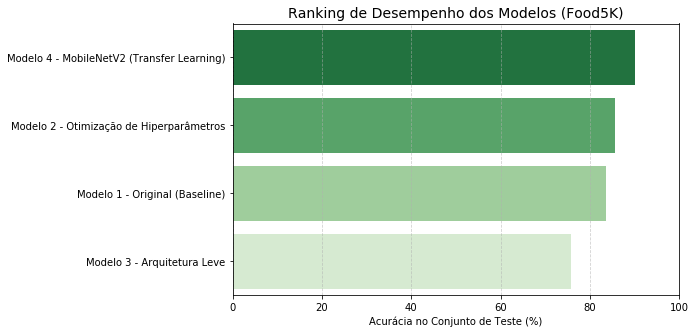

Melhor Modelo: Modelo 4 - MobileNetV2 (Transfer Learning) — Acurácia: 90.20%


In [34]:

# RANKING DOS MODELOS - COMPARAÇÃO FINAL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário com resultados
resultados = {
    'Modelo': [
        'Modelo 1 - Original (Baseline)',
        'Modelo 2 - Otimização de Hiperparâmetros',
        'Modelo 3 - Arquitetura Leve',
        'Modelo 4 - MobileNetV2 (Transfer Learning)'
    ],
    'Acurácia (%)': [acc1, acc2, acc3, acc4]
}

# Cria DataFrame ordenado
df_resultados = pd.DataFrame(resultados).sort_values(by='Acurácia (%)', ascending=False).reset_index(drop=True)

# Exibe tabela com gradiente de cor
print("\nRANKING FINAL DOS MODELOS (Food vs Non-Food)\n")
display(df_resultados.style.background_gradient(cmap='Greens').format({'Acurácia (%)': '{:.2f}'}))

# Gráfico de barras horizontal (ranking visual)
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_resultados,
    y='Modelo',
    x='Acurácia (%)',
    palette='Greens_r'
)
plt.title('Ranking de Desempenho dos Modelos (Food5K)', fontsize=14)
plt.xlabel('Acurácia no Conjunto de Teste (%)')
plt.ylabel('')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Mostra o campeão
melhor_modelo = df_resultados.iloc[0]
print(f"Melhor Modelo: {melhor_modelo['Modelo']} — Acurácia: {melhor_modelo['Acurácia (%)']:.2f}%")



# 5. Curvas de Treinamento

## 5.1 Curvas de Treinamento - Modelo 1 (Original)

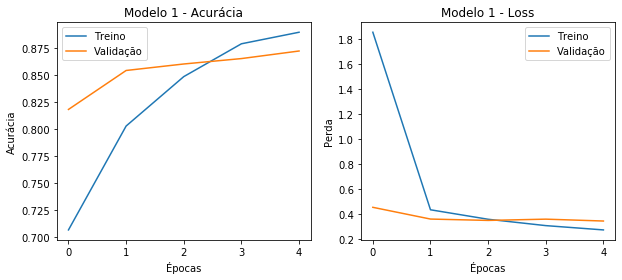

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(Y.history['accuracy'], label='Treino')
plt.plot(Y.history['val_accuracy'], label='Validação')
plt.title('Modelo 1 - Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Y.history['loss'], label='Treino')
plt.plot(Y.history['val_loss'], label='Validação')
plt.title('Modelo 1 - Loss')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

## 5.2 Curvas de Treinamento - Modelo 2 (Otimização de Hiperparâmetros)

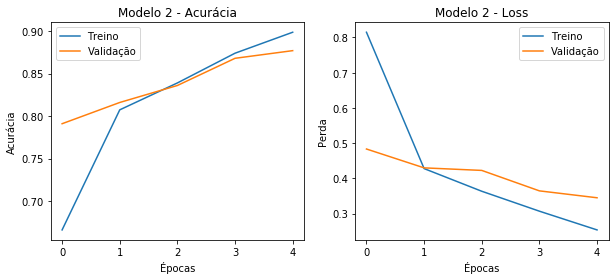

In [36]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_opt.history['accuracy'], label='Treino')
plt.plot(history_opt.history['val_accuracy'], label='Validação')
plt.title('Modelo 2 - Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_opt.history['loss'], label='Treino')
plt.plot(history_opt.history['val_loss'], label='Validação')
plt.title('Modelo 2 - Loss')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


## 5.3 Curvas de Treinamento - Modelo 3 (Arquitetura Leve)

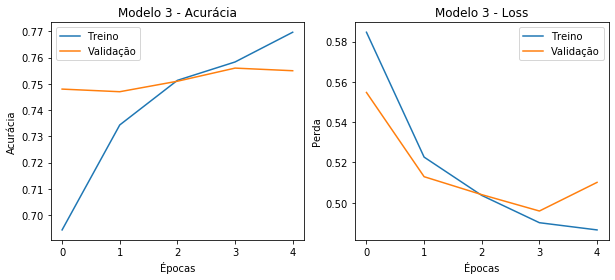

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_light.history['accuracy'], label='Treino')
plt.plot(history_light.history['val_accuracy'], label='Validação')
plt.title('Modelo 3 - Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_light.history['loss'], label='Treino')
plt.plot(history_light.history['val_loss'], label='Validação')
plt.title('Modelo 3 - Loss')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# **6. Conclusões**

Nesta seção, apresentamos as conclusões do trabalho. Neste estudo foram analisados quatro modelos para a tarefa de classificação de imagens relacionados ao food e non-food. Os três primeiros modelos foram redes convolucionais treinadas com variações na arquitetura e nos hiperparâmetros enquanto o quarto modelo utilizou a técnica de transfer learning com a arquitetura pré-treinada MobileNetV2.

Os resultados obtidos indicaram que o Modelo 4 (MobileNetV2 - Transfer Learning) apresentou o melhor desempenho geral alcançando uma acurácia de 0.9020 no conjunto de teste. Já os outros modelos treinados obtiveram resultados inferiores: o Modelo 1 (Original) atingiu 0.8360, o Modelo 2 (Otimização de Hiperparâmetros) obteve 0.8560 e o Modelo 3 (Arquitetura Leve) apresentou o menor desempenho com 0.7570.

Nesse sentido, os resultados demonstram a eficácia do transfer learning na tarefa de classificação de imagens, especialmente quando o conjunto de dados disponível é limitado. A utilização de pesos pré-treinados permitiu extrair características mais robustas e generalizáveis, resultando em uma melhor classificação com  relação aos outros modelos treinados. No entanto mesmo com esse avanço, ainda existe espaço para aprimoramentos pois a acurácia de 90% sugere que o modelo pode cometer erros em situações mais complexas ou com imagens ambíguas.

Possíveis fatores que podem ter influenciado o desempenho como: o tamanho do dataset que pode ser insuficiente, o balanceamento entre as classes, qualidade das imagens entre outros.

Sugestões para trabalhos futuros:

* Aumentar o tamanho do dataset: Um conjunto de dados maior e mais variado pode contribuir para uma melhor generalização e reduzir o risco de overfitting.

* Melhorar a qualidade das imagens: Aplicar técnicas de pré-processamento, como correção de iluminação, aumento de contraste e remoção de ruído, pode melhorar a detecção de padrões relevantes.

* Balanceamento das classes: Caso haja desequilíbrio entre as categorias food e non-food, recomenda-se o uso de técnicas como oversampling nas classes minoritárias ou undersampling nas majoritárias.

* Ajuste de hiperparâmetros: Explorar variações de taxa de aprendizado, tamanho de batch, número de épocas e funções de ativação pode levar a ganhos adicionais de desempenho.

* Aumento de dados (data augmentation): Aplicar transformações como rotações, espelhamentos, cortes e variações de brilho ajuda o modelo a se tornar mais robusto a diferentes condições visuais.

* Explorar outras arquiteturas: Testar modelos pré-treinados mais leves, como EfficientNet ou MobileNetV3, pode melhorar ainda mais o equilíbrio entre precisão e eficiência.